# Description of the final project

## Introduction

In this project, you are going to work with the dataset based on the census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. Your goal is to predict level of income of a person: "- 50000" (means less than \$50k/year) or "50000+" (means more than \$50k/year). The data is split into train (`train.csv`) and test (`test.csv`) parts. You should use train part to train the models, and test part to estimate their final quality. The best quality on the test dataset should be your final result.

The description of the data is available here: https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

_Citation:_

* _Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._

## Detailed Task Description

The solution should have the following parts:

### [25%] 1. Data exploration

* 1.1. (8%) Which metric are you going to use to evaluate the performance of the model and why?
* 1.2. (8%) Which validation strategy are you going to use and why? Apply it to the data on the preprocessing step
* 1.3. (9%) Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions

### [25%] 2. Data preprocessing

* 2.1. (8%) Fill missing values (if there are any)
* 2.2. (9%) Properly encode categorical features. Explain your choice of methods of categorical feature encoding
* 2.3. (8%) Cluster observations and add cluster number as one of the features. Make sure that the clustering method has a good quality

### [25%] 3. Model training

* 3.1. (8%) Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)
* 3.2. (9%) Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models
* 3.3. (8%) Perform blending or stacking of the trained machine learning algorithms. Carefully tune the weights of the ensemble

### [25%] 4. Summary

* 4.1. (8%) Estimate the quality of the models and their ensemble on the test set. Describe the results. Which model is the best?
* 4.2. (8%) Interpret the best single model and the ensemble. Use at least 2 model interpretation techniques. Explain, why your models have good quality (or bad quality)
* 4.3. (9%) Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

### General Requirements

* You should provide a solution in the form of the Jupyter Notebook with code cells and markdown cells (with text)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques
* Support all your statements with calculations and plots. For instance, if you claim that the dataset does not have missing values, you need to provide the code which shows that the total number of missing values is zero

# 1. Data exploration

1.1  We will use Balanced Accuracy metric to evaluate the performance of the model, because our task is binary classification and data is imbalamced (it will be swhown in preprocessing step).

1.2 We will use a validation set to fine-tune various hyperparameters to help the models fit the data. 

1.3 Exploring features:

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math 

In [29]:
test = pd.read_csv ('census-income.test', header = None) 
test.shape

(99762, 42)

In [30]:
train = pd.read_csv ('census-income.data', header=None)
train.shape

(199523, 42)

In [31]:
columns = [
    'age', 'class of worker','detailed industry recode','detailed occupation recode','education','wage per hour','enroll in edu inst last wk','marital stat','major industry code',
    'major occupation code','race','hispanic origin','sex','member of a labor union','reason for unemployment','full or part time employment stat','capital gains','capital losses','dividends from stocks','tax filer stat','region of previous residence','state of previous residence','detailed household and family stat',
    'detailed household summary in household','instance weight','migration code-change in msa','migration code-change in reg','migration code-move within reg','live in this house 1 year ago','migration prev res in sunbelt','num persons worked for employer','family members under 18','country of birth father','country of birth mother','country of birth self','citizenship','own business or self employed',"fill inc questionnaire for veteran admin","veterans benefits",'weeks worked in year','year','target']

In [32]:
len(columns)

42

In [33]:
train.columns = columns
test.columns = columns

In [34]:
train.head(3)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran admin,veterans benefits,weeks worked in year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.


First of all, let us explore the dataset. As far as we can see, the data consists of numerical and categorical features:

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   age                                       199523 non-null  int64  
 1   class of worker                           199523 non-null  object 
 2   detailed industry recode                  199523 non-null  int64  
 3   detailed occupation recode                199523 non-null  int64  
 4   education                                 199523 non-null  object 
 5   wage per hour                             199523 non-null  int64  
 6   enroll in edu inst last wk                199523 non-null  object 
 7   marital stat                              199523 non-null  object 
 8   major industry code                       199523 non-null  object 
 9   major occupation code                     199523 non-null  object 
 10  race                

In [36]:
train.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [37]:
train.describe(include=object)

,class of worker,education,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,...,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,fill inc questionnaire for veteran admin,target
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,...,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,9,17,3,7,24,15,5,10,2,3,...,10,3,4,5,43,43,43,5,3,2
top,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
freq,100245,48407,186943,86485,100684,100684,167365,171907,103984,180459,...,99696,101212,99696,144232,159163,160479,176989,176992,197539,187141


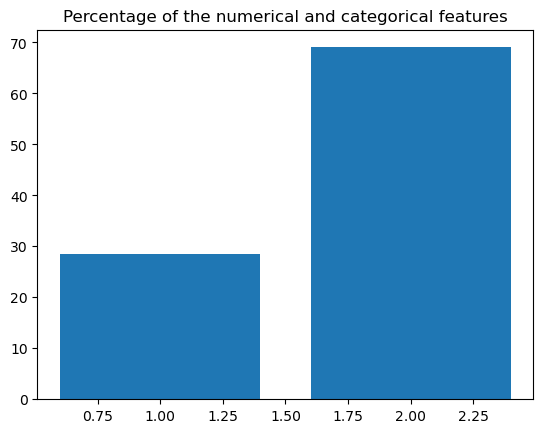

In [38]:
num = len(train.select_dtypes(include=['int64']).columns)/len(train.columns)*100
obj = len(train.select_dtypes(include=['object']).columns)/len(train.columns)*100
plt.bar([1, 2], [num, obj])
plt.title ('Percentage of the numerical and categorical features')
plt.show()


The distribution of features of type 'object':

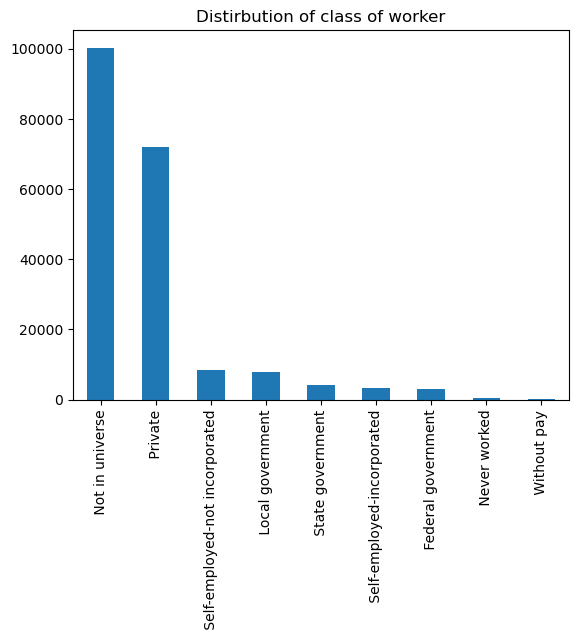

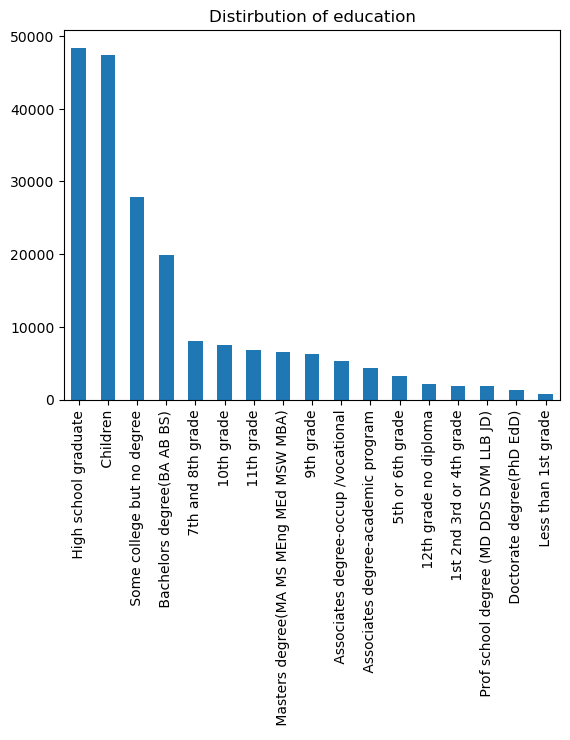

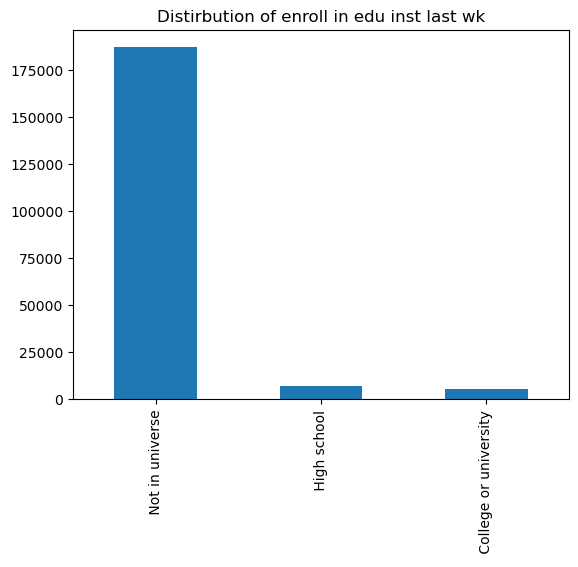

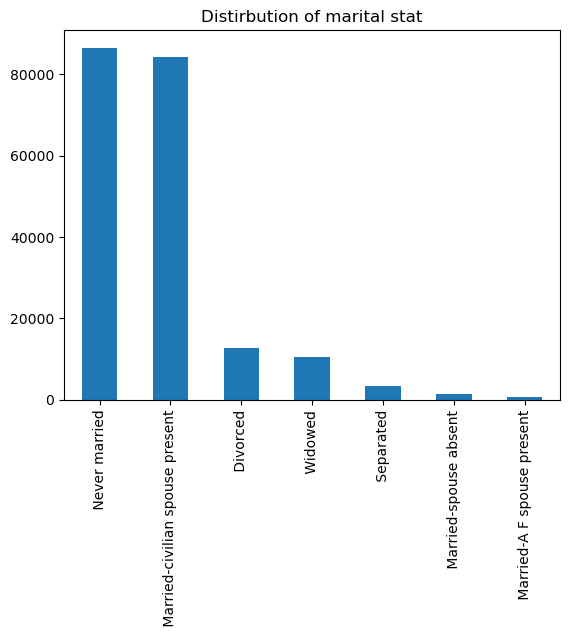

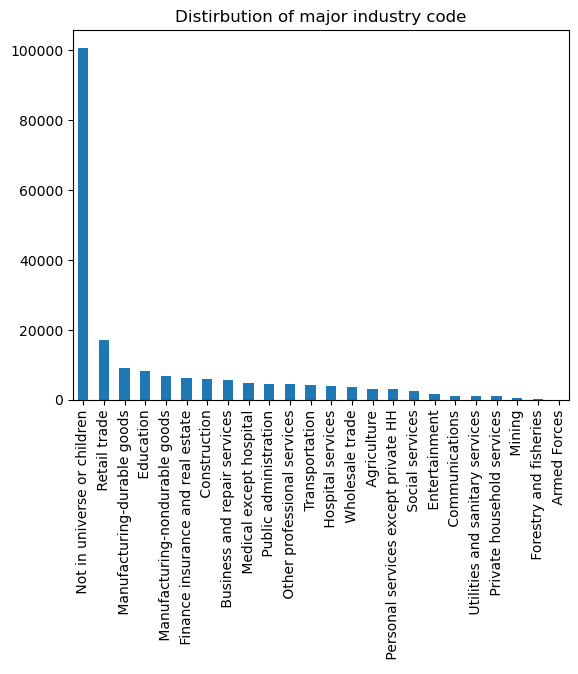

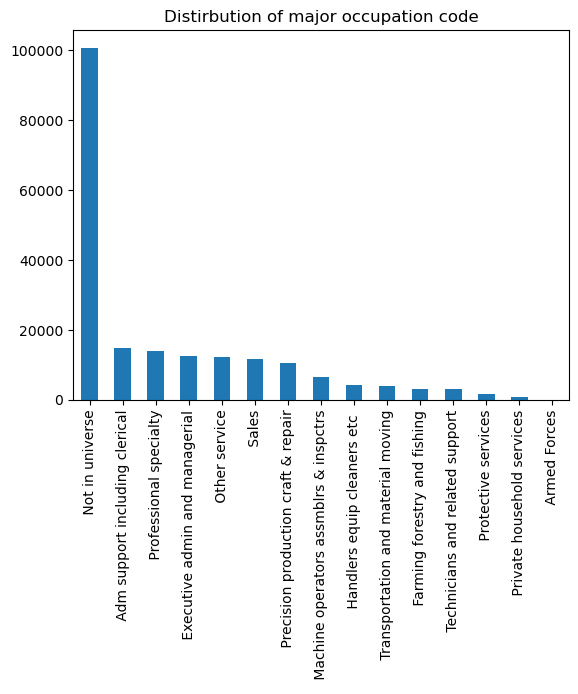

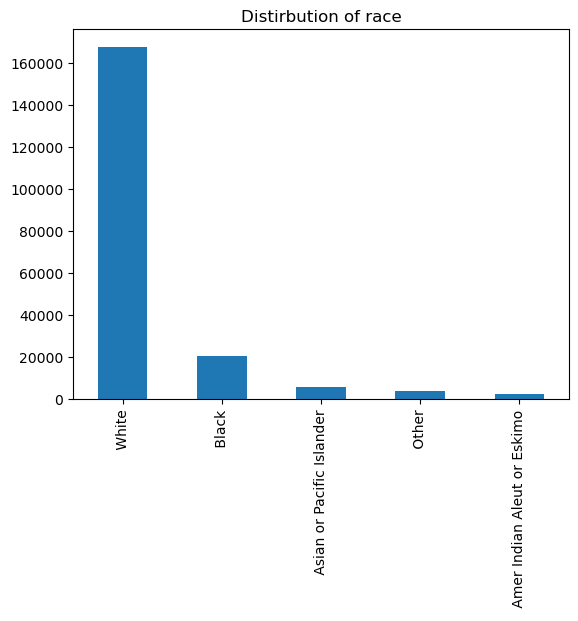

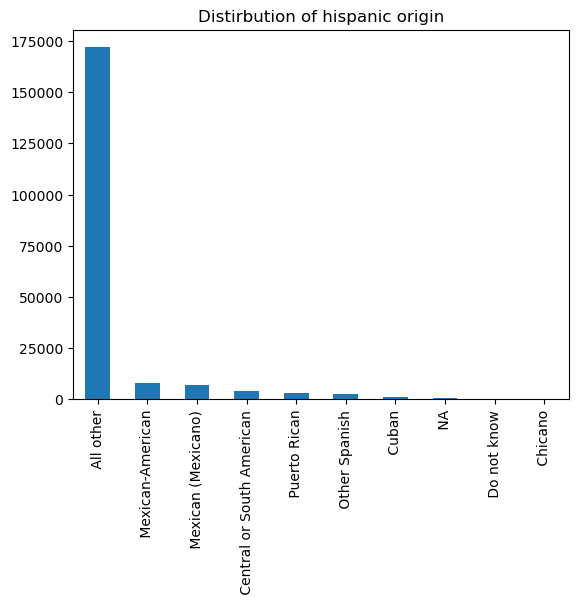

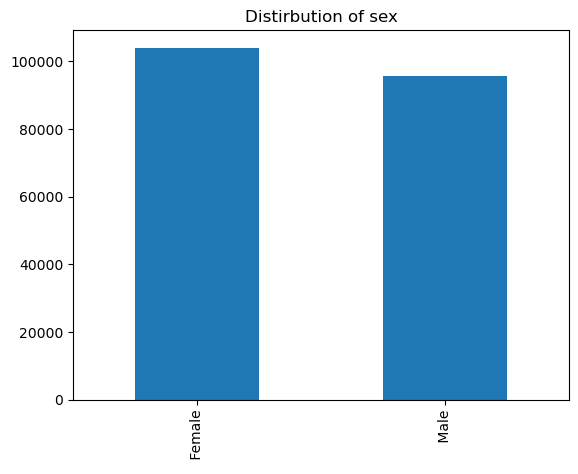

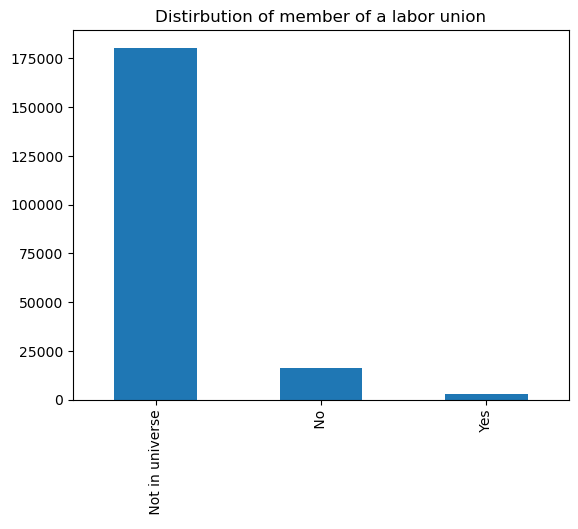

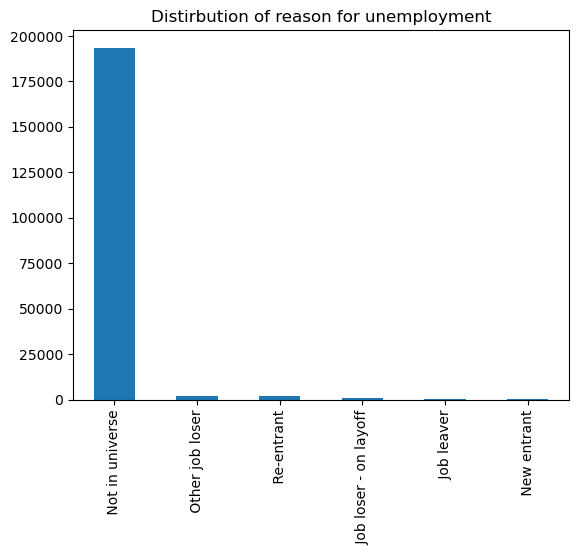

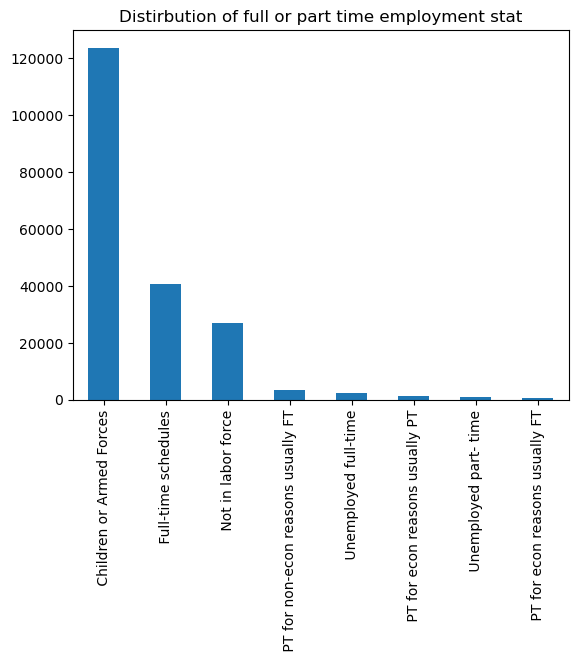

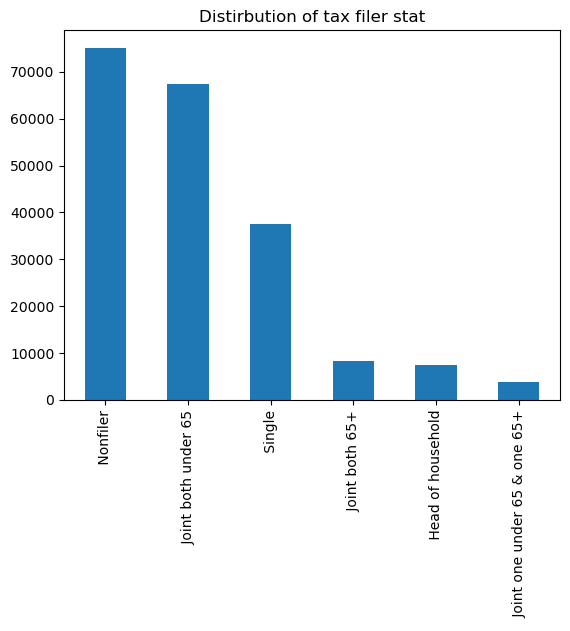

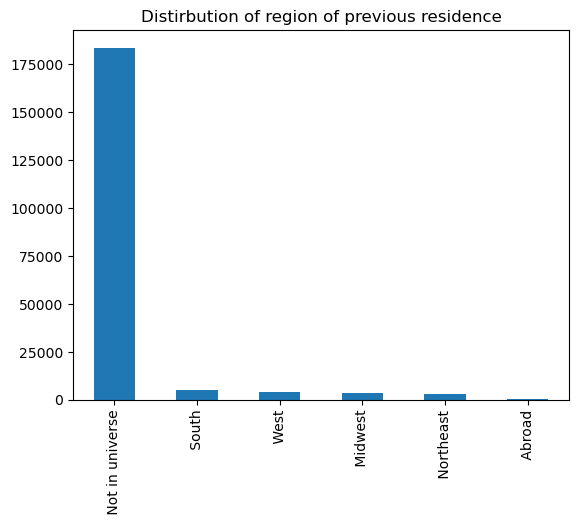

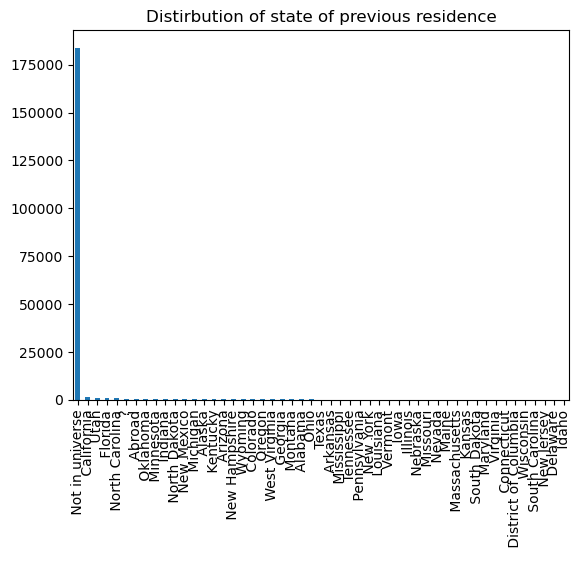

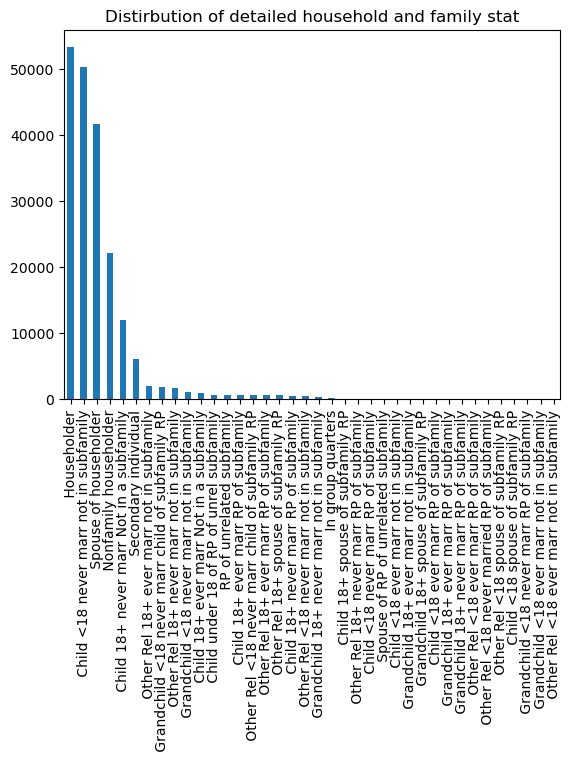

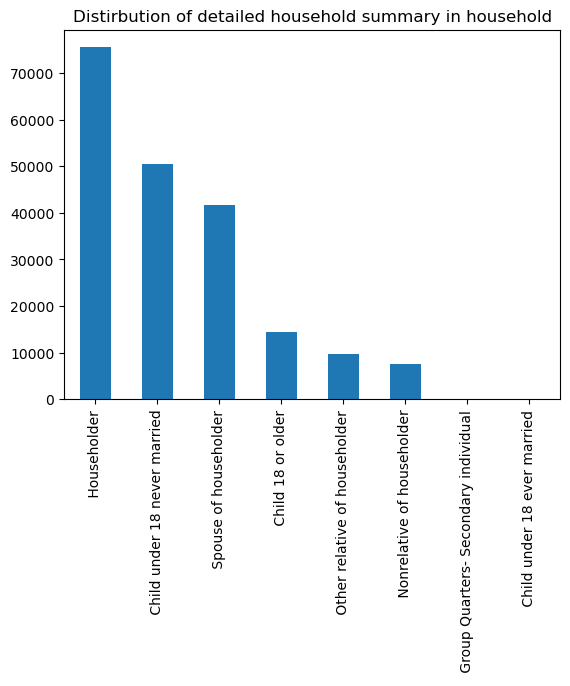

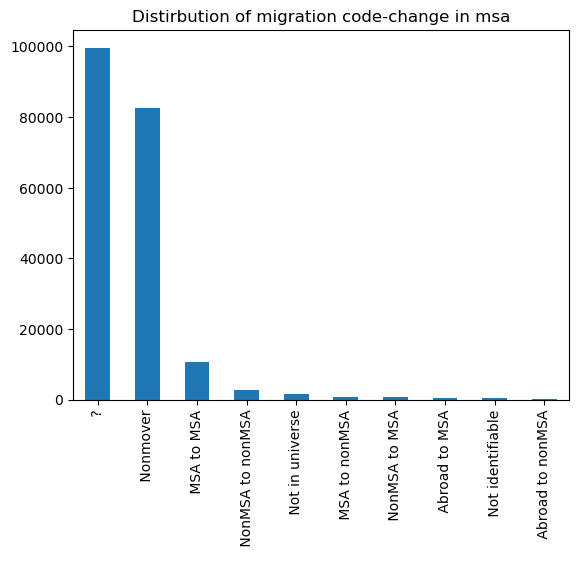

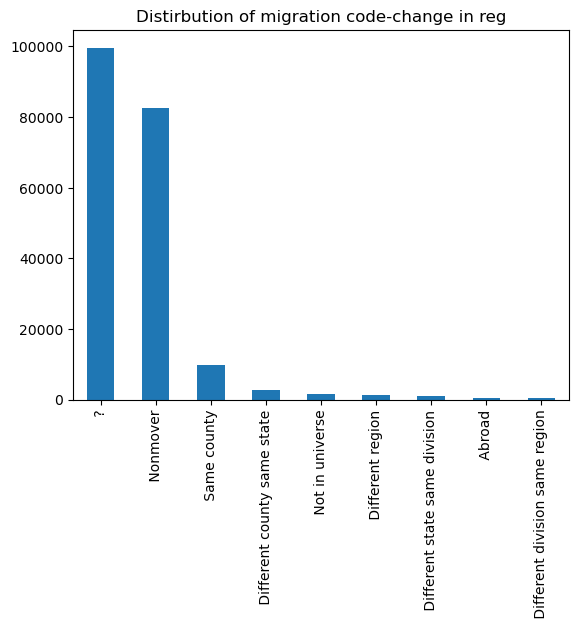

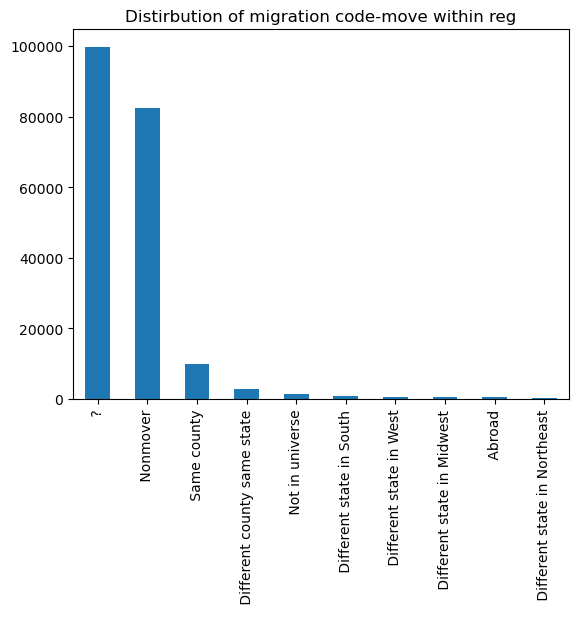

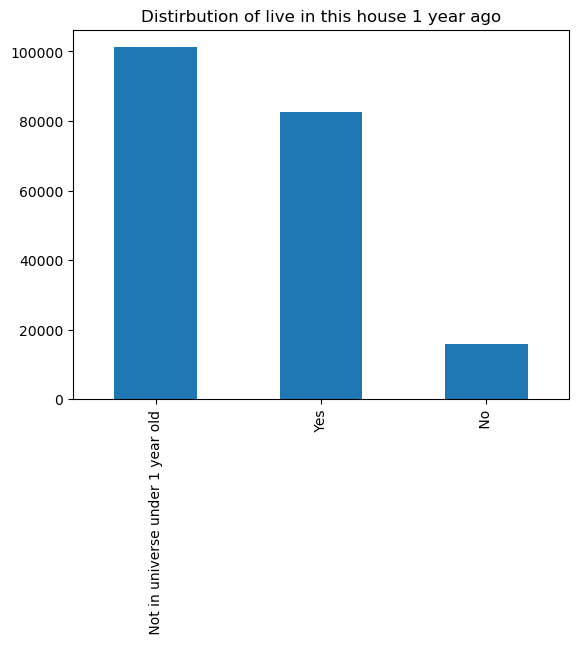

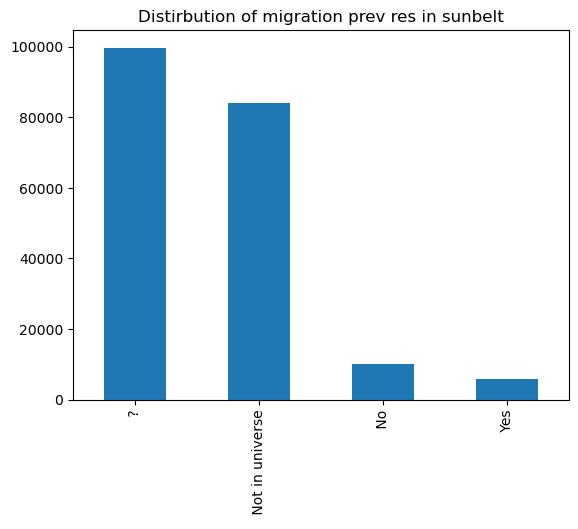

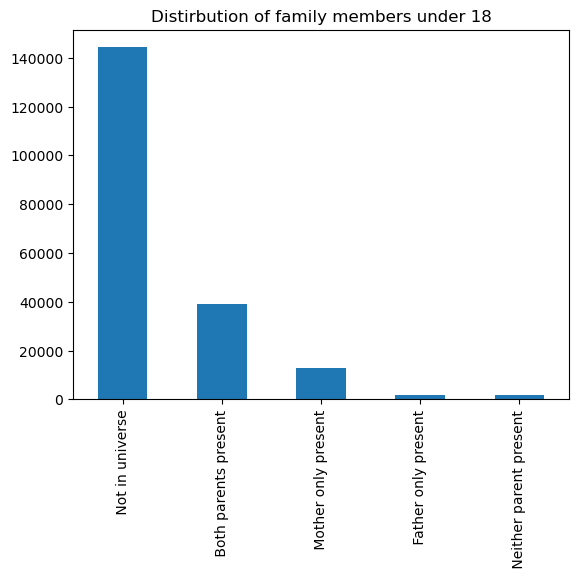

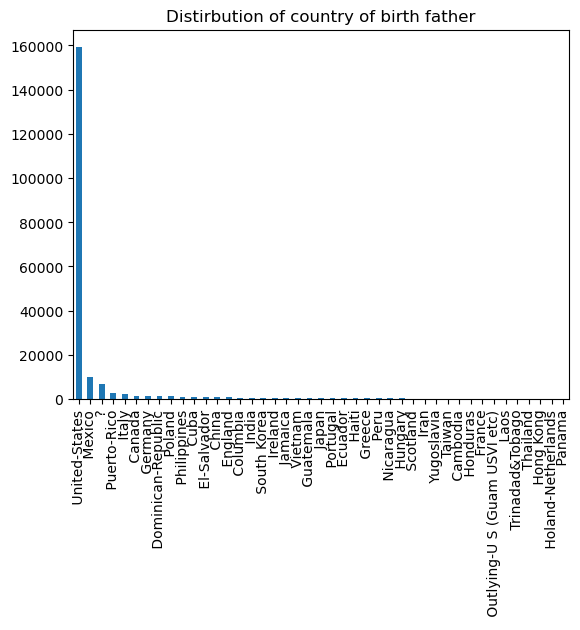

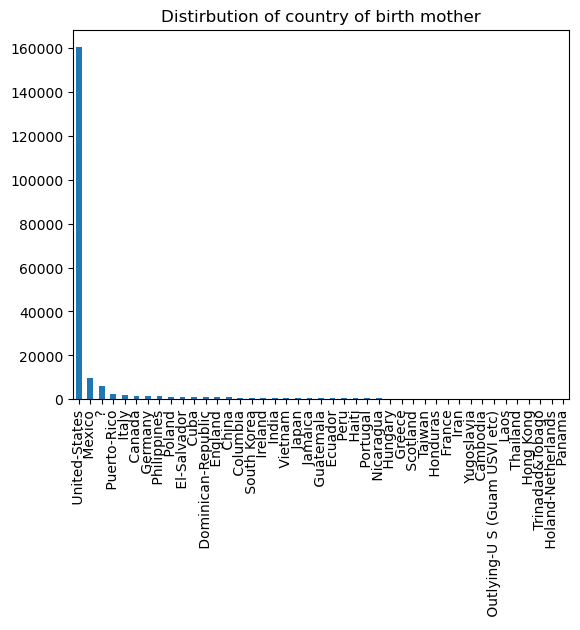

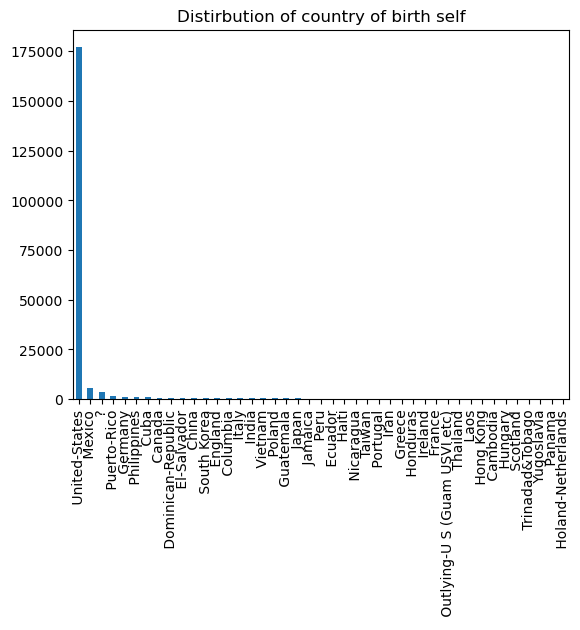

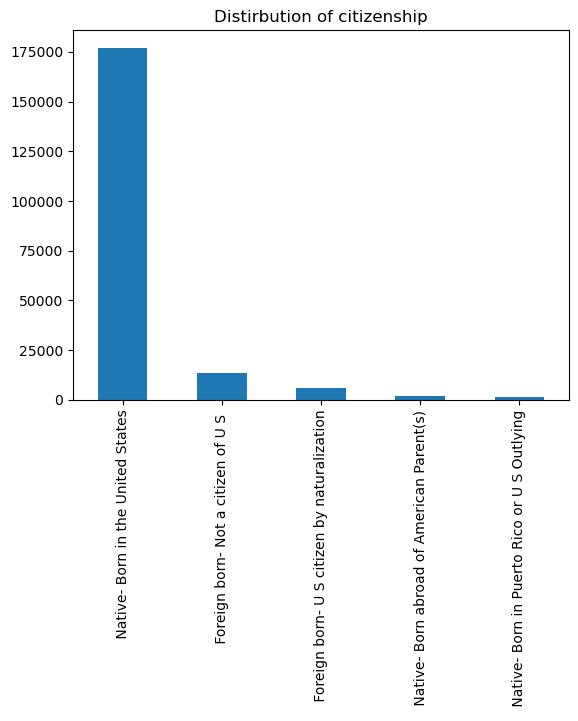

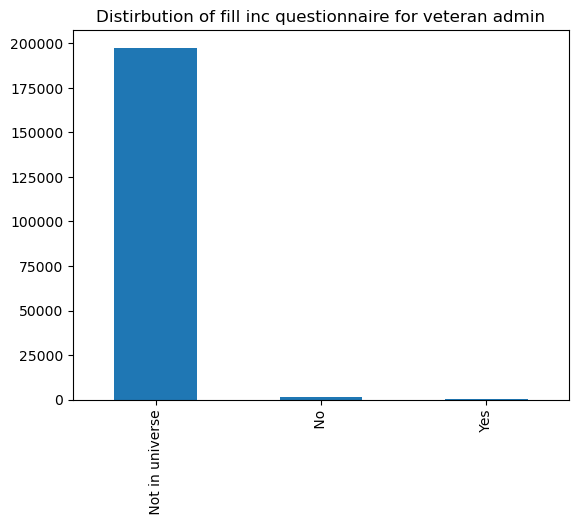

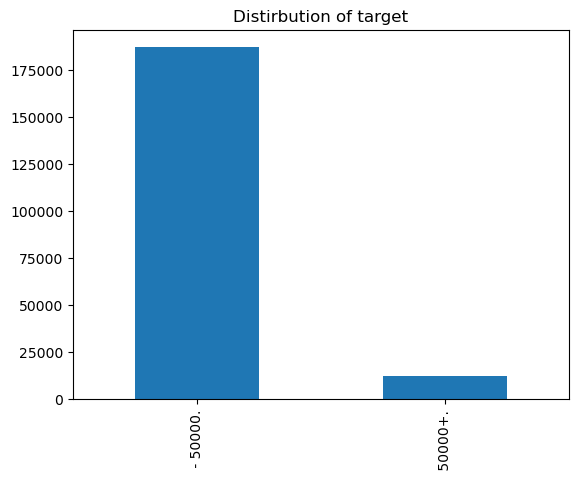

In [39]:
for column in list(train.select_dtypes(include=['object']).columns):
    train[column].value_counts().plot(kind='bar')
    plt.title(f'Distirbution of {column}')
    plt.show()

According to the distributions of categorical features, we can make some conclusions:
- the distribution of major industry code is pretty similar to the distribution of major occupation code; 
- the distribution of hispanic origin shows the biggest part of observations belongs to the catgory 'all other', other catgories include very little amount of observations;
- some of the categorical features include category 'Not in universe', that means that the question did not apply to this person. We can drop features, in which this category is prevailing, and other categories are very low, since they are not informative.
- we can drop feature 'state of previous residence', as it is more detailed version of the feature 'region of previous residence';
- features 'detailed household and family stat' and 'detailed household summary in household' consists of the same information, but the first feature icnludes more detailed categories. Also these features are similary distributed. This is why we can leave only second feature in the data. 
- there are 3 features, describng migration code change. These feature's distributions are quite similar. We can leave the first one.
- there are some features with category '?'. '?' can be interpreted as null, because it does not give us any information. 
- features 'country of birth father', 'country of birth mother', 'country of birth self' are similary distributed. The prevailing category - 'United-States', second place - 'Mexico'.
- According to the distribution of the target variable, the data is imbalanced - category '- 50000' prevails and inculdes much more observations.

As a result, we can drop columns, which belong to the not informative features:

In [40]:
train = train.drop(['enroll in edu inst last wk', 'member of a labor union', 'reason for unemployment', 
                    'state of previous residence',
                    'detailed household and family stat', 
                    'migration code-change in reg',
                    'migration code-move within reg',
                    'migration prev res in sunbelt', 
                    'fill inc questionnaire for veteran admin'], axis = 1)
test = test.drop(['enroll in edu inst last wk', 'member of a labor union', 'reason for unemployment', 
                    'state of previous residence',
                    'detailed household and family stat', 
                    'migration code-change in reg',
                    'migration code-move within reg',
                    'migration prev res in sunbelt', 
                    'fill inc questionnaire for veteran admin'], axis = 1)


We will replace '?' value with null:

In [41]:
for column in list(train.select_dtypes(include=['object']).columns):
    train.loc[train[column].str.contains(r'\?'), [column]] = np.nan

The distribution of features of type 'integer':

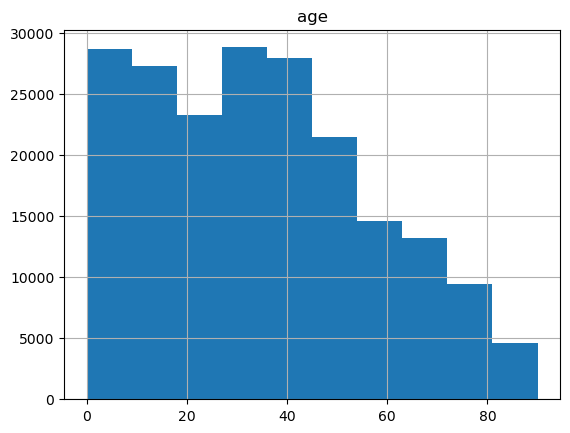

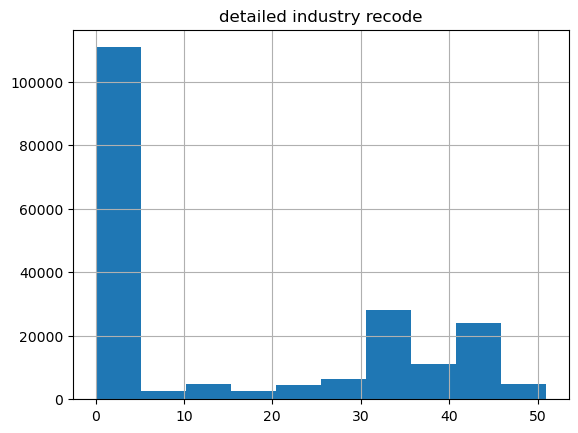

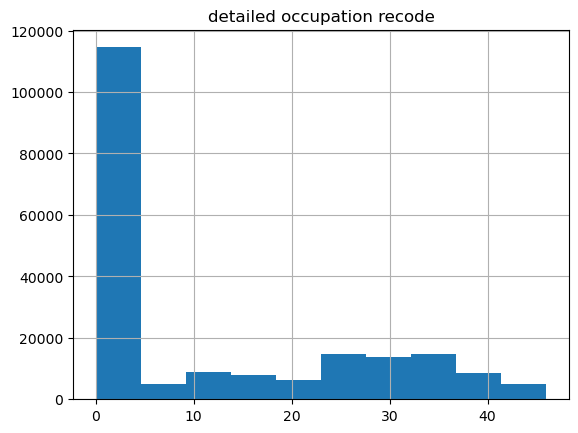

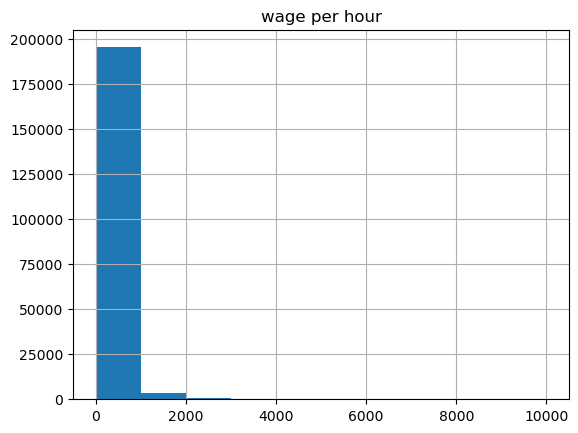

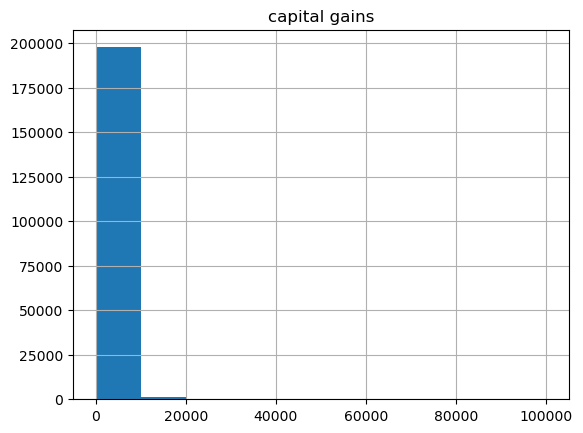

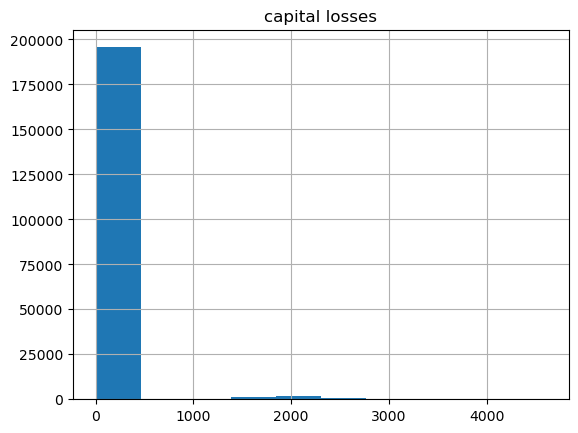

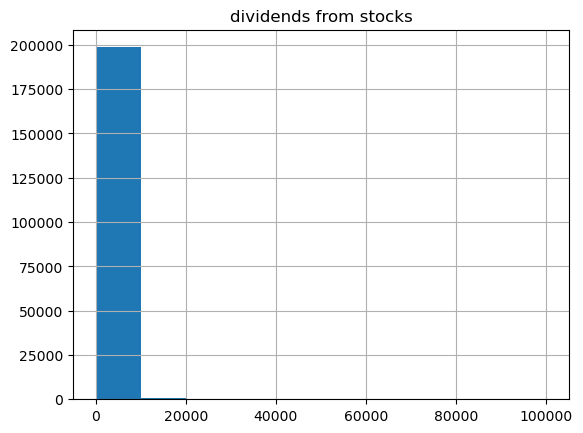

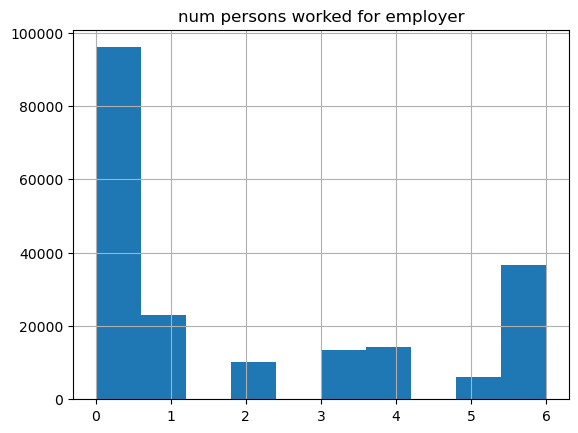

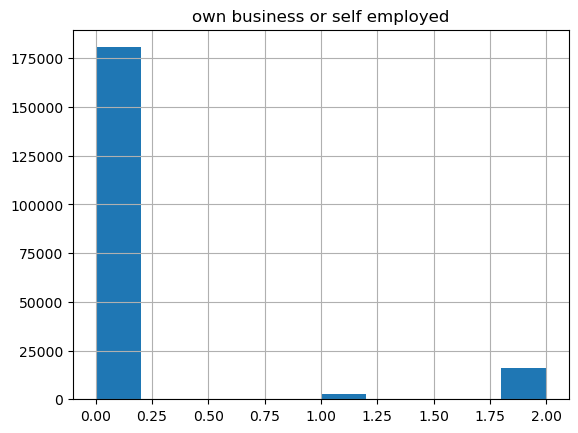

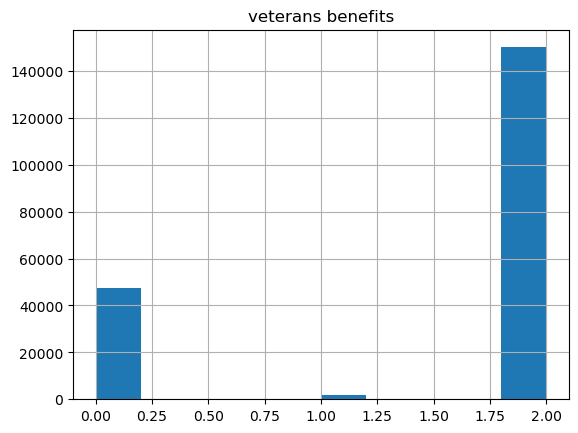

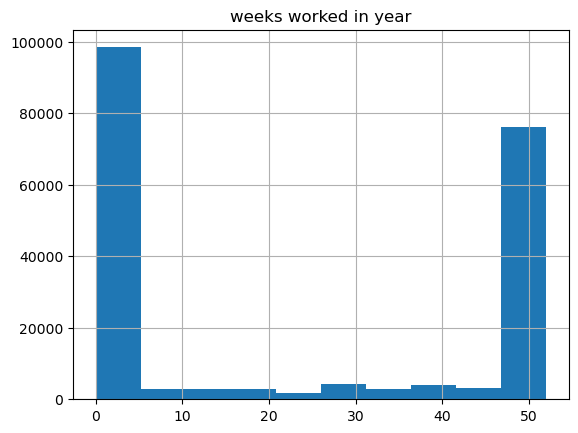

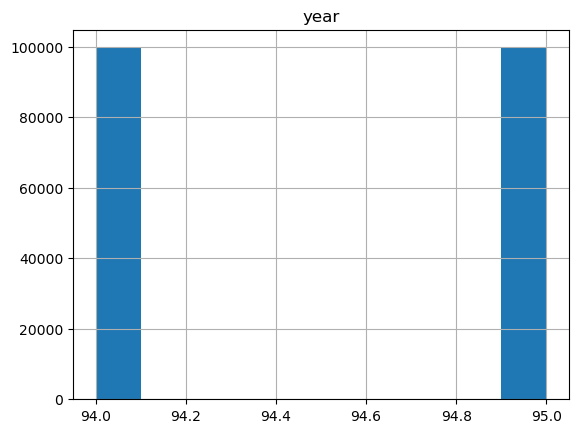

In [42]:
for column in list(train.select_dtypes(include=['int64']).columns):
     train.hist(column=column)

According to the distributions of features of type 'integer' , we can make some conclusions:
- the distribution of 'detailed occupation recode' is pretty similar to the distribution of 'detailed industry recode', these features can be considered as categorical, as each code means some category; 
- features 'own business or self employed', 'veterans benefits', 'year', can be considered as categorical, as each code means some category.
- features 'age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', num persons worked for employer', 'weeks worked in year' are  continuous

# 2. Data preprocessing

## 2.1 Filling missing values
There are some missing values in the data:

In [43]:
train.isnull().sum()

age                                            0
class of worker                                0
detailed industry recode                       0
detailed occupation recode                     0
education                                      0
wage per hour                                  0
marital stat                                   0
major industry code                            0
major occupation code                          0
race                                           0
hispanic origin                                0
sex                                            0
full or part time employment stat              0
capital gains                                  0
capital losses                                 0
dividends from stocks                          0
tax filer stat                                 0
region of previous residence                   0
detailed household summary in household        0
instance weight                                0
migration code-chang

Percentage of missing values:

In [44]:
def missing_values(column):
    p = len(train[train[column].isnull()][column])/len(train)*100
    print(f'Percentage of missing values in {column}: {p} %')
    
for column in train.isnull().sum()[train.isnull().sum()>0].index:
    missing_values(column)

Percentage of missing values in migration code-change in msa: 49.967171704515266 %
Percentage of missing values in country of birth father: 3.3645243906717517 %
Percentage of missing values in country of birth mother: 3.0668143522300686 %
Percentage of missing values in country of birth self: 1.7005558256441615 %


Since all the missing values are less then 50% of considered columns, it is not reasonable to drop these columns. We can fill missing values in columns cosisting of country of birth with most frequent value. 

In [45]:
train = train.apply(lambda x: x.fillna(x.value_counts().index[0]))

## 2.2. Encoding features

Let us divide all features to different groups according to their specific: 

In [46]:
numerical = ['age', 'wage per hour', 'capital gains', 'capital losses', 
             'dividends from stocks', 'num persons worked for employer', 'weeks worked in year' ]
categorical = ['class of worker', 'marital stat', 'race', 'sex', 'live in this house 1 year ago',
              'citizenship', 'family members under 18']
many_categories = ['education', 'major industry code', 'major occupation code', 
                   'hispanic origin', 'region of previous residence', 'detailed household summary in household',
                  'migration code-change in msa', 'full or part time employment stat', 'tax filer stat',
                  'country of birth father','country of birth mother', 'country of birth self', 'target']

For continuous features we will use the StandardScaler method from Scikit-learn to standardize features by removing the mean and scaling to a standard deviation of 1:

In [47]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
train[numerical]=stand_scaler.fit_transform(train[numerical])
test[numerical]=stand_scaler.fit_transform(test[numerical])

For categorical features, which include 5 or less categories, we will use the One-hot-encoding, since this method helps to keep as much information, as possible: 

In [48]:
train = pd.get_dummies(train, columns=categorical)
test = pd.get_dummies(test, columns=categorical)

For traget value and categorical features, which include more then 5 categories, we will use label encoding, since it does not lead to increasing the amount of columns in dataset:

In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for feature in many_categories:
    train[feature] = label_encoder.fit_transform(train[feature])
    test[feature] = label_encoder.fit_transform(test[feature])


## 2.3. Clustering observations 


In [50]:
X_train = train.drop(['target'], axis = 1)
y_train = train['target']
X_test = test.drop(['target'], axis = 1)
y_test = test['target']

In [53]:
from sklearn.cluster import KMeans
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X_train)
    sse.append(km.inertia_)

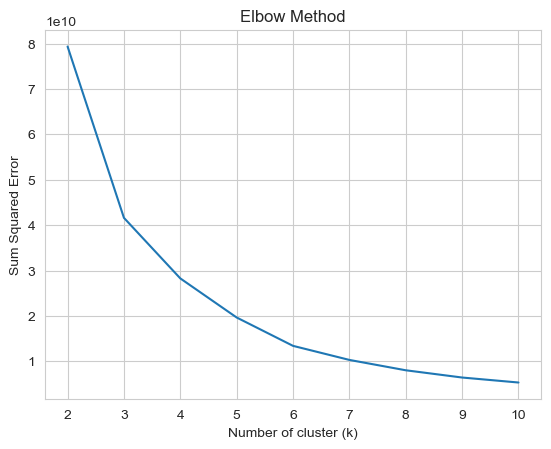

In [55]:
import seaborn as sns

sns.set_style("whitegrid")
g=sns.lineplot(x=range(2,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

We can observe that at k=3 there is an elbow-like situation. So, let us create one more column in the dataset with number of cluste.

In [56]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X_train)
train_pred = kmeans.fit_predict(X_train)
X_train['cluster']=train_pred

In [57]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X_test)
test_pred = kmeans.fit_predict(X_test)
X_test['cluster']=test_pred

# 3. Model training
## 3.1. Working with imbalanced data


In [58]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

In [59]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print('Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_test, y_pred)))

Accuracy (balanced): 0.69625


In [60]:
forest_2 = RandomForestClassifier(class_weight='balanced')
forest_2.fit(X_train, y_train)
y_pred_2 = forest_2.predict(X_test)

print('Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_test, y_pred_2)))

Accuracy (balanced): 0.63310


In [61]:
adasyn = ADASYN(sampling_strategy=0.8, n_neighbors=5, random_state=13)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
forest_2.fit(X_adasyn, y_adasyn)
y_pred_3 = forest_2.predict(X_test)

print('Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_test, y_pred_3)))

Accuracy (balanced): 0.76525


We will not balance the test data. The imbalance must be preserved in the test set because this is a real world data. It doesn't make sense to test on the balanced data if we are eventually going to use the model for real world imbalanced data.

## 3.2. Training machine learning models

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=13)

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic')

# Fit the model to the training data
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
print('Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_val, y_pred)))

Accuracy (balanced): 0.71182


In [65]:
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50)
y_pred = xgb.predict(X_val)

/Users/veronika/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.21755
[1]	validation_0-logloss:0.19031
[2]	validation_0-logloss:0.17202
[3]	validation_0-logloss:0.15890
[4]	validation_0-logloss:0.14955
[5]	validation_0-logloss:0.14249
[6]	validation_0-logloss:0.13736
[7]	validation_0-logloss:0.13329
[8]	validation_0-logloss:0.13049
[9]	validation_0-logloss:0.12852
[10]	validation_0-logloss:0.12691
[11]	validation_0-logloss:0.12536
[12]	validation_0-logloss:0.12355
[13]	validation_0-logloss:0.12248
[14]	validation_0-logloss:0.12208
[15]	validation_0-logloss:0.12108
[16]	validation_0-logloss:0.12046
[17]	validation_0-logloss:0.11988
[18]	validation_0-logloss:0.11943
[19]	validation_0-logloss:0.11902
[20]	validation_0-logloss:0.11862
[21]	validation_0-logloss:0.11818
[22]	validation_0-logloss:0.11832
[23]	validation_0-logloss:0.11789
[24]	validation_0-logloss:0.11801
[25]	validation_0-logloss:0.11833
[26]	validation_0-logloss:0.11827
[27]	validation_0-logloss:0.11821
[28]	validation_0-logloss:0.11788
[29]	validation_0-loglos

In [66]:
print('Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_val, y_pred)))

Accuracy (balanced): 0.70788


In [67]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=100, depth=8, learning_rate=0.1,
                           loss_function='Logloss', custom_metric=['AUC'], random_seed=42)
cbc.fit(X_train, y_train)

0:	learn: 0.5143534	total: 91.3ms	remaining: 9.04s
1:	learn: 0.3794888	total: 112ms	remaining: 5.48s
2:	learn: 0.2969565	total: 133ms	remaining: 4.31s
3:	learn: 0.2476268	total: 159ms	remaining: 3.82s
4:	learn: 0.2191318	total: 182ms	remaining: 3.46s
5:	learn: 0.1957054	total: 205ms	remaining: 3.21s
6:	learn: 0.1791716	total: 229ms	remaining: 3.04s
7:	learn: 0.1674424	total: 252ms	remaining: 2.9s
8:	learn: 0.1588319	total: 277ms	remaining: 2.8s
9:	learn: 0.1525108	total: 302ms	remaining: 2.72s
10:	learn: 0.1483138	total: 323ms	remaining: 2.61s
11:	learn: 0.1456578	total: 347ms	remaining: 2.55s
12:	learn: 0.1418977	total: 376ms	remaining: 2.51s
13:	learn: 0.1387132	total: 406ms	remaining: 2.49s
14:	learn: 0.1371537	total: 430ms	remaining: 2.44s
15:	learn: 0.1351407	total: 462ms	remaining: 2.43s
16:	learn: 0.1335938	total: 493ms	remaining: 2.41s
17:	learn: 0.1319854	total: 526ms	remaining: 2.39s
18:	learn: 0.1310789	total: 556ms	remaining: 2.37s
19:	learn: 0.1298595	total: 592ms	remainin

In [68]:
y_pred = cbc.predict(X_val)
print('Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_val, y_pred)))

Accuracy (balanced): 0.70742


In [69]:
from lightgbm import LGBMClassifier 
  
lgbmc = LGBMClassifier() 
lgbmc.fit(X_train, y_train) 
y_val = lgbmc.predict(X_val) 
print('Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_val, y_pred)))

Accuracy (balanced): 0.90649


## 3.3 Blending Ensemble

In [ ]:
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

def get_dataset():
    X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('knn', KNeighborsClassifier()))
    models.append(('cart', DecisionTreeClassifier()))
    models.append(('svm', SVC()))
    models.append(('bayes', GaussianNB()))
    return models

def fit_ensemble(models, X_train, X_val, y_train, y_val):
    meta_X = list()
    for name, model in models:
        model.fit(X_train, y_train)
        yhat = model.predict(X_val)
        yhat = yhat.reshape(len(yhat), 1)
        meta_X.append(yhat)
    meta_X = hstack(meta_X)
    blender = LogisticRegression()
    blender.fit(meta_X, y_val)
    return blender

def predict_ensemble(models, blender, X_test):
    meta_X = list()
    for name, model in models:
        yhat = model.predict(X_test)
        yhat = yhat.reshape(len(yhat), 1)
        meta_X.append(yhat)
    meta_X = hstack(meta_X)
    return blender.predict(meta_X)

models = get_models()
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
yhat = predict_ensemble(models, blender, X_test)
score = balanced_accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score*100))

# 4. Summary

## 4.1 Estimating the models on the test set

In [70]:
y_lgmc = lgbmc.predict(X_test) 
y_xgb = xgb.predict(X_test)
y_cbc = cbc.predict(X_test)

print('Lgmc Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_test, y_lgmc)))
print('Xgb Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_test, y_xgb)))
print('Cbc Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_test, y_cbc)))

Lgmc Accuracy (balanced): 0.71503
Xgb Accuracy (balanced): 0.70937
Cbc Accuracy (balanced): 0.70409


## 4.2 Interpreting the best model

In [71]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['-50000', '50000+'],
    mode='classification'
)

In [72]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=lgbmc.predict_proba
)

exp.show_in_notebook(show_table=True)

## 4.3 Conclusion

- The data was imbalanced, but reason for this imbalance was in the fact that people's income was analyzed, which is actually not balanced in real world. This is why for final models we used imbalanced data. 
- The data was preprocessed. For continious features we used scaling, for categorical features OneHotEncoding and LabelEncoding. 
- For our binary classification task 3 models were used: XGBClassifier, CatBoostClassifier, LGBMClassifier. The best result was obtained with LGBMClassifier. 
